In [36]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.spatial.distance import cdist



[[ 0.87898644  0.54959954  0.68379241  0.8316362   0.86086084  0.57001937
   0.87859567  0.89038847  1.36331666  0.68460553]
 [ 0.93571228  1.13340442  0.53130538  0.82801114  1.17544039  0.78375507
   0.73341115  0.69338648  1.00962577  0.81806845]]
[[ 3.59583694  4.01520335  4.0545639   4.40604148  3.56402488  3.89336499
   4.03665727  4.24040706  3.9762594   3.90233223]
 [ 4.36449431  4.36159807  3.57153652  3.52057165  4.30303118  4.21405064
   4.07364071  3.64465936  4.37367256  4.1339114 ]]


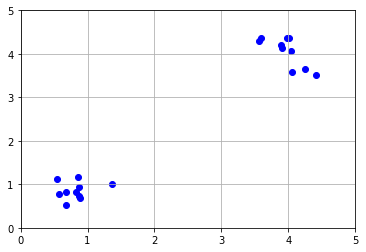

In [2]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
print(cluster1)


cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
print(cluster2)

X = np.hstack((cluster1, cluster2)).T

plt.figure()
plt.axis([0, 5, 0, 5])
plt.grid(True)
plt.scatter(X[:,0], X[:,1], color='b')
plt.legend()
plt.show()

df = pd.DataFrame(X, columns=['X1', 'X2'])

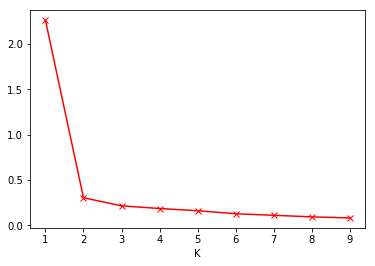

In [17]:
#平均畸变程度衡量！
#用肘部法则来确定最佳的K值！
K = range(1,10)
mean_dist_store = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    mean_dist_store.append(sum(np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1))/df.shape[0])

plt.plot(K, mean_dist_store, 'rx-')
plt.xlabel('K')
plt.show()

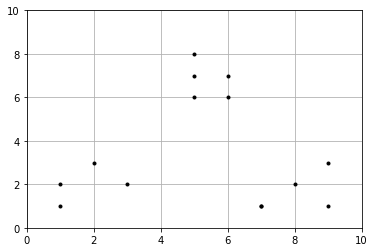

In [19]:
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X=np.array(list(zip(x1,x2))).reshape(len(x1),2)
df = pd.DataFrame(X, columns=['X1', 'X2'])
plt.figure()
plt.axis([0,10,0,10])
plt.grid(True)
plt.plot(X[:,0],X[:,1],'k.')

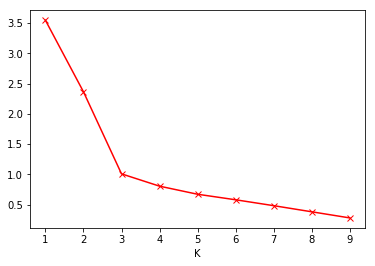

In [20]:
#平均畸变程度衡量！
#用肘部法则来确定最佳的K值！
K = range(1,10)
mean_dist_store = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    mean_dist_store.append(sum(np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1))/df.shape[0])

plt.plot(K, mean_dist_store, 'rx-')
plt.xlabel('K')
plt.show()

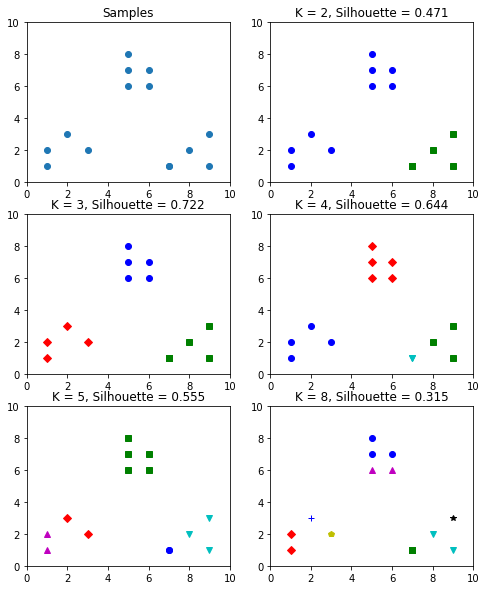

In [31]:
plt.figure(figsize=(8,10))
plt.subplot(3,2,1)
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Samples')
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests=[2,3,4,5,8]
subplot_counter=1
for t in tests:
    subplot_counter+=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model=KMeans(n_clusters=t).fit(X)
#     print kmeans_model.labels_:每个点对应的标签值
    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i],x2[i],color=colors[l],
             marker=markers[l],ls='None')
        plt.xlim([0,10])
        plt.ylim([0,10])
        plt.title('K = %s, Silhouette = %.03f' % 
                  (t, metrics.silhouette_score
                   (X, kmeans_model.labels_,metric='euclidean'))
                  )

58.0467980296


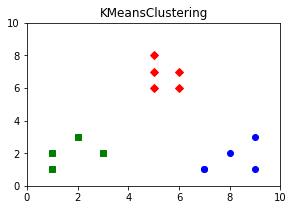

6.83555491162


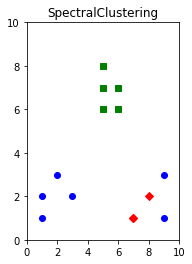

In [61]:
kmeans = KMeans(n_clusters=3).fit(X)
spectral_kmeans = SpectralClustering(n_clusters=3).fit(X)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
for i,l in enumerate(kmeans.labels_):
    plt.plot(x1[i],x2[i],color=colors[l],
         marker=markers[l],ls='None')
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title('KMeansClustering')
print(metrics.calinski_harabaz_score(X, kmeans.labels_))
plt.show()

plt.subplot(1,2,2)
for i,l in enumerate(spectral_kmeans.labels_):
    plt.plot(x1[i],x2[i],color=colors[l],
         marker=markers[l],ls='None')
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title('SpectralClustering')
print(metrics.calinski_harabaz_score(X, spectral_kmeans.labels_))
plt.show()

In [42]:
print(kmeans.labels_)
print(spectral_kmeans.labels_)

[0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[1 1 1 1 0 0 0 0 0 2 2 1 2 1]


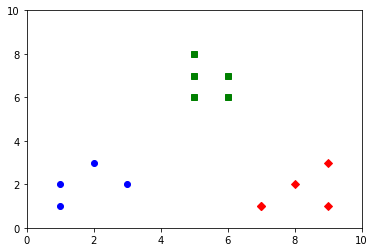

In [45]:
for i,l in enumerate(kmeans.labels_):
    plt.plot(x1[i],x2[i],color=colors[l],
         marker=markers[l],ls='None')
    plt.xlim([0,10])
    plt.ylim([0,10])
plt.show()

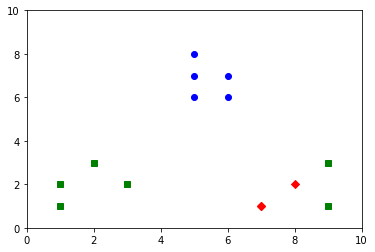

In [46]:
for i,l in enumerate(spectral_kmeans.labels_):
    plt.plot(x1[i],x2[i],color=colors[l],
         marker=markers[l],ls='None')
    plt.xlim([0,10])
    plt.ylim([0,10])
plt.show()